In [11]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
data = pd.read_csv("covid.csv")
data.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [13]:
pc = le.fit_transform(data["pc"])
wbc = le.fit_transform(data["wbc"])
mc = le.fit_transform(data['mc'])
ast = le.fit_transform(data['ast'])
bc = le.fit_transform(data['bc'])
ldh = le.fit_transform(data['ldh'])
y = le.fit_transform(data['diagnosis'])
x = np.array(list(zip(pc,wbc,mc,ast,bc,ldh)))

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state = 42)
model = MultinomialNB().fit(xtrain,ytrain)

In [15]:
ypred = model.predict(xtest)

In [16]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5



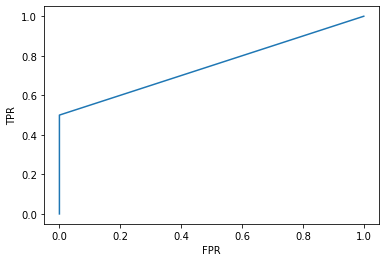

AUc:  0.75


In [17]:
fpr,tpr,threshold = metrics.roc_curve(ytest,ypred,pos_label=1)
plt.plot(fpr,tpr)
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()
print("AUc: ",metrics.auc(fpr,tpr))